<a href="https://colab.research.google.com/github/Rajaanthonysamy/Interview_Preparation/blob/main/HospitalPatients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: Data Cleaning
Load the dataset and inspect:

df.head(), df.info(), df.describe()

df.isna().sum()

Clean column-level issues:

Fix typos: "Malee" → "Male", "Prrivate" → "Private"

Standardize categorical values in Gender, Room Type, Outcome

Handle missing values:

Fill Gender, Room Type, Insurance Coverage % with appropriate logic (mode/median/custom)

Impute Treatment Cost if possible or drop rows if critical

Handle outliers:

Remove or cap ages <0 or >120

Remove or treat extreme Heart Rate values (e.g., >220 or <30)

Investigate high/low Temperature (C) and cap outliers

Parse columns:

Split Blood Pressure into Systolic BP and Diastolic BP

Count medications in Medication List

🏗️ Phase 2: Feature Engineering
Add Stay (Days) = Discharge Date − Admission Date

Compute Insurance Paid = Treatment Cost × Insurance Coverage % / 100

Categorize Age:

Child (<18)

Adult (18–60)

Senior (>60)

Create High Risk flag:

True if: Temperature > 39, or Heart Rate > 130, or Systolic BP > 150, or Diastolic BP > 90

Derive Number of Medications from Medication List

🔁 Phase 3: GroupBy & Aggregation Tasks
Avg. treatment cost per department

Total number of patients per diagnosis

Avg. heart rate and age per gender

Avg. cost and stay grouped by department and outcome

Distribution of outcomes per diagnosis

Proportion of high-risk patients per department

Most common diagnosis per department

Avg. insurance coverage by room type

Avg. number of medications per department

Median BP (systolic/diastolic) per department

📊 Phase 4: Data Visualization
Use Seaborn / Matplotlib

Univariate
Histogram: Age, Treatment Cost, Stay (Days)

Countplot: Gender, Outcome, Room Type

Bivariate
Boxplot: Treatment Cost vs. Room Type

Violinplot: Temperature vs. Outcome

Barplot: Avg. Cost by Department

Multivariate
Heatmap: Correlation of all numeric features

Pairplot: Age, BP, Heart Rate, Cost, Temp

Time Series
Line: Number of admissions by month

Line: Avg. treatment cost over time

💡 Phase 5: Insight Generation
Answer these from your analysis:

Which departments cost the most on average?

Is there a relationship between high-risk patients and longer hospital stays?

Do private rooms tend to have more or less insurance coverage?

Which age group has the highest average treatment cost?

Is there a seasonality in admissions or cost spikes?

Are patients with more medications staying longer or costing more?

Which combinations of diagnosis + department show the worst outcomes?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("hospital_patients.csv")

In [5]:
df.head(2)

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,Medication List,Blood Pressure,Heart Rate,Temperature (C),Outcome,Discharge Date
0,PID1189,Clifford Simmons,Male,16,2022-07-12,Oncology,COVID-19,89722.16,30.0,General,"Aspirin, Antibiotic, Vitamin D",108/80,116,36.2,Recovered,2022-07-18
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,"Paracetamol, Vitamin D, Insulin",176/79,132,39.1,Recovered,2022-12-27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            1000 non-null   object 
 1   Name                  1000 non-null   object 
 2   Gender                980 non-null    object 
 3   Age                   1000 non-null   int64  
 4   Admission Date        1000 non-null   object 
 5   Department            1000 non-null   object 
 6   Diagnosis             1000 non-null   object 
 7   Treatment Cost        951 non-null    float64
 8   Insurance Coverage %  924 non-null    float64
 9   Room Type             985 non-null    object 
 10  Medication List       1000 non-null   object 
 11  Blood Pressure        1000 non-null   object 
 12  Heart Rate            1000 non-null   int64  
 13  Temperature (C)       1000 non-null   float64
 14  Outcome               1000 non-null   object 
 15  Discharge Date        

In [7]:
df.describe()

,Age,Treatment Cost,Insurance Coverage %,Heart Rate,Temperature (C)
count,1000.000000,951.000000,924.000000,1000.000000,1000.000000
mean,46.501000,50555.287361,49.870130,109.402000,36.987300
std,24.353626,14621.167027,32.273621,45.380654,1.191221
min,-13.000000,10460.480000,0.000000,20.000000,33.000000
25%,32.000000,40940.650000,20.000000,71.000000,36.200000
50%,46.000000,49991.660000,50.000000,108.000000,37.000000
75%,59.250000,60221.765000,80.000000,147.000000,37.800000
max,150.000000,104865.530000,100.000000,250.000000,40.800000


In [8]:
df.isna().sum()

,0
Patient ID,0
Name,0
Gender,20
Age,0
Admission Date,0
Department,0
Diagnosis,0
Treatment Cost,49
Insurance Coverage %,76
Room Type,15


In [9]:
df.head(2)

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,Medication List,Blood Pressure,Heart Rate,Temperature (C),Outcome,Discharge Date
0,PID1189,Clifford Simmons,Male,16,2022-07-12,Oncology,COVID-19,89722.16,30.0,General,"Aspirin, Antibiotic, Vitamin D",108/80,116,36.2,Recovered,2022-07-18
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,"Paracetamol, Vitamin D, Insulin",176/79,132,39.1,Recovered,2022-12-27


In [10]:
df.shape

(1000, 16)

## Handling Missing Value

In [11]:
df.groupby(["Diagnosis","Room Type"])["Insurance Coverage %"].mean()

Diagnosis     Room Type   
COVID-19      General         55.757576
              Private         50.983607
              Prrivate        62.000000
              Semi-Private    43.770492
Cancer        General         45.223881
              Private         45.454545
              Prrivate        58.000000
              Semi-Private    52.826087
Diabetes      General         47.540984
              Private         48.095238
              Prrivate        55.000000
              Semi-Private    47.254902
Fracture      General         52.266667
              Private         50.975610
              Prrivate        30.000000
              Semi-Private    51.969697
Hypertension  General         52.948718
              Private         44.418605
              Prrivate        41.666667
              Semi-Private    53.559322
Name: Insurance Coverage %, dtype: float64

In [12]:
df.head(2)

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,Medication List,Blood Pressure,Heart Rate,Temperature (C),Outcome,Discharge Date
0,PID1189,Clifford Simmons,Male,16,2022-07-12,Oncology,COVID-19,89722.16,30.0,General,"Aspirin, Antibiotic, Vitamin D",108/80,116,36.2,Recovered,2022-07-18
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,"Paracetamol, Vitamin D, Insulin",176/79,132,39.1,Recovered,2022-12-27


In [13]:
df["Gender"].isna().sum()

np.int64(20)

In [14]:
gender_mode=df["Gender"].mode()[0]

In [15]:
df["Diagnosis"].unique()

array(['COVID-19', 'Diabetes', 'Fracture', 'Hypertension', 'Cancer'],
      dtype=object)

In [16]:
df["Department"].unique()

array(['Oncology', 'Pediatrics', 'Neurology', 'Orthopedics', 'Cardiology'],
      dtype=object)

In [17]:
df["Gender"]=df["Gender"].fillna(gender_mode)

In [18]:
df["Gender"].unique()

array(['Male', 'Female', 'Other', 'Malee'], dtype=object)

In [19]:
df["Gender"].value_counts()

,count
Gender,
Male,472
Female,428
Other,82
Malee,18


In [20]:
df["Gender"]=df["Gender"].str.replace("ee","e")

In [21]:
##df["Gender"].apply(lambda x: "Male" if x=="Mal" else x)

In [22]:
df["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [23]:
df.head(2)

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,Medication List,Blood Pressure,Heart Rate,Temperature (C),Outcome,Discharge Date
0,PID1189,Clifford Simmons,Male,16,2022-07-12,Oncology,COVID-19,89722.16,30.0,General,"Aspirin, Antibiotic, Vitamin D",108/80,116,36.2,Recovered,2022-07-18
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,"Paracetamol, Vitamin D, Insulin",176/79,132,39.1,Recovered,2022-12-27


In [24]:
df.Age.isna().sum()

np.int64(0)

In [25]:
df["Admission Date"].isna().sum()

np.int64(0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient ID            1000 non-null   object 
 1   Name                  1000 non-null   object 
 2   Gender                1000 non-null   object 
 3   Age                   1000 non-null   int64  
 4   Admission Date        1000 non-null   object 
 5   Department            1000 non-null   object 
 6   Diagnosis             1000 non-null   object 
 7   Treatment Cost        951 non-null    float64
 8   Insurance Coverage %  924 non-null    float64
 9   Room Type             985 non-null    object 
 10  Medication List       1000 non-null   object 
 11  Blood Pressure        1000 non-null   object 
 12  Heart Rate            1000 non-null   int64  
 13  Temperature (C)       1000 non-null   float64
 14  Outcome               1000 non-null   object 
 15  Discharge Date        

In [27]:
df["Admission Date"]=pd.to_datetime(df["Admission Date"])
df["Discharge Date"]=pd.to_datetime(df["Discharge Date"])

In [28]:
df["Stay"]=df["Discharge Date"]-df["Admission Date"]

In [29]:
df["Stay"]=df["Stay"].astype(str).str.split(" ").str[0].astype(int)

In [30]:
df[df["Stay"]<=0]

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,Medication List,Blood Pressure,Heart Rate,Temperature (C),Outcome,Discharge Date,Stay


In [31]:
df["discharge_day"]=df["Discharge Date"].dt.day
df["discharge_month"]=df["Discharge Date"].dt.month
df["discha_year"]=df["Discharge Date"].dt.year

df["admission_day"]=df["Admission Date"].dt.day
df["admission_month"]=df["Admission Date"].dt.month
df["admission_year"]=df["Admission Date"].dt.year

In [32]:
df.head(2)

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Temperature (C),Outcome,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year
0,PID1189,Clifford Simmons,Male,16,2022-07-12,Oncology,COVID-19,89722.16,30.0,General,...,36.2,Recovered,2022-07-18,6,18,7,2022,12,7,2022
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,...,39.1,Recovered,2022-12-27,5,27,12,2022,22,12,2022


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            1000 non-null   object        
 1   Name                  1000 non-null   object        
 2   Gender                1000 non-null   object        
 3   Age                   1000 non-null   int64         
 4   Admission Date        1000 non-null   datetime64[ns]
 5   Department            1000 non-null   object        
 6   Diagnosis             1000 non-null   object        
 7   Treatment Cost        951 non-null    float64       
 8   Insurance Coverage %  924 non-null    float64       
 9   Room Type             985 non-null    object        
 10  Medication List       1000 non-null   object        
 11  Blood Pressure        1000 non-null   object        
 12  Heart Rate            1000 non-null   int64         
 13  Temperature (C)    

In [34]:
df["Room Type"].unique()

array(['General', 'Semi-Private', nan, 'Private', 'Prrivate'],
      dtype=object)

In [35]:
df["Room Type"].mode()

,Room Type
0,General


In [36]:
df["Room Type"].isna().sum()

np.int64(15)

In [37]:
df["Room Type"]=df["Room Type"].fillna(df["Room Type"].mode()[0])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            1000 non-null   object        
 1   Name                  1000 non-null   object        
 2   Gender                1000 non-null   object        
 3   Age                   1000 non-null   int64         
 4   Admission Date        1000 non-null   datetime64[ns]
 5   Department            1000 non-null   object        
 6   Diagnosis             1000 non-null   object        
 7   Treatment Cost        951 non-null    float64       
 8   Insurance Coverage %  924 non-null    float64       
 9   Room Type             1000 non-null   object        
 10  Medication List       1000 non-null   object        
 11  Blood Pressure        1000 non-null   object        
 12  Heart Rate            1000 non-null   int64         
 13  Temperature (C)    

In [39]:
df["Treatment Cost"].isna().sum()

np.int64(49)

In [40]:
df["Insurance Coverage %"].isna().sum()

np.int64(76)

<Axes: ylabel='Treatment Cost'>

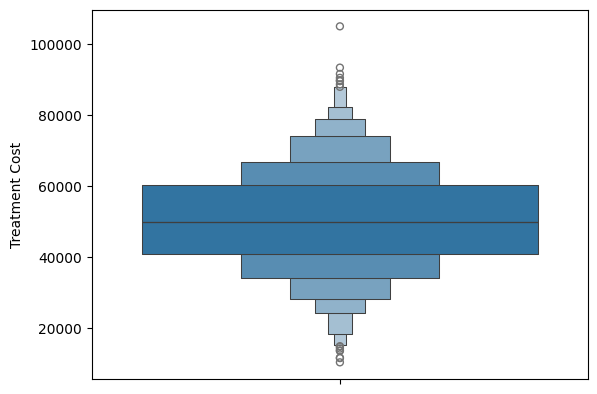

In [41]:
sns.boxenplot(df["Treatment Cost"])

<Axes: ylabel='Treatment Cost'>

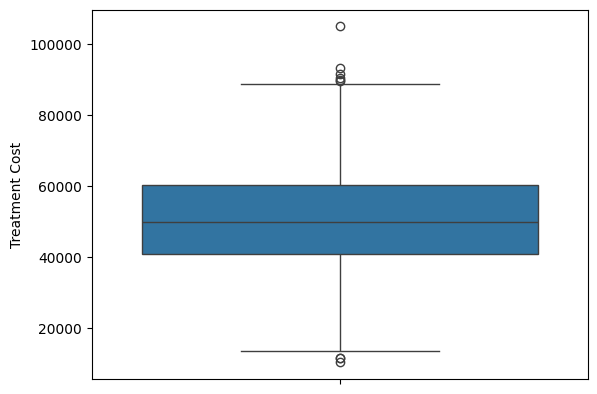

In [42]:
sns.boxplot(df["Treatment Cost"])

In [43]:
df["Treatment Cost"].describe()

,Treatment Cost
count,951.000000
mean,50555.287361
std,14621.167027
min,10460.480000
25%,40940.650000
50%,49991.660000
75%,60221.765000
max,104865.530000


In [44]:
Q1 = df["Treatment Cost"].quantile(0.25)
Q3 = df["Treatment Cost"].quantile(0.75)
IQR = Q3 - Q1
print("IQR =", IQR)


IQR = 19281.115000000005


In [45]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [46]:
outliers = df[(df["Treatment Cost"] < lower_bound) | (df["Treatment Cost"] > upper_bound)]

In [47]:
outliers.index

Index([0, 33, 139, 370, 463, 634, 763, 885, 987], dtype='int64')

In [48]:
df.drop(index=outliers.index,inplace=True)

In [49]:
df["Treatment Cost"].isna().sum()

np.int64(49)

In [50]:
df["Treatment Cost"]=df["Treatment Cost"].fillna(df["Treatment Cost"].mean())

In [51]:
df["Treatment Cost"].isna().sum()

np.int64(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  915 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Blood Pressure        991 non-null    object        
 12  Heart Rate            991 non-null    int64         
 13  Temperature (C)       991

In [53]:
df["Room Type"].unique()

array(['Semi-Private', 'General', 'Private', 'Prrivate'], dtype=object)

In [54]:
df["Room Type"]=df["Room Type"].str.replace("rr","r")

In [55]:
coverage_llokup=df.groupby(["Department","Diagnosis","Room Type"])["Insurance Coverage %"].mean().reset_index()

In [56]:
coverage_llokup

,Department,Diagnosis,Room Type,Insurance Coverage %
0,Cardiology,COVID-19,General,47.058824
1,Cardiology,COVID-19,Private,60.000000
2,Cardiology,COVID-19,Semi-Private,41.176471
3,Cardiology,Cancer,General,53.333333
4,Cardiology,Cancer,Private,41.333333
...,...,...,...,...
70,Pediatrics,Fracture,Private,51.250000
71,Pediatrics,Fracture,Semi-Private,37.058824
72,Pediatrics,Hypertension,General,43.333333
73,Pediatrics,Hypertension,Private,49.090909


In [57]:
def fill_ins_cover(row):
  print(type((row)))
  department=row["Department"]
  print(department)
  diagnosis=row["Diagnosis"]
  room_type=row["Room Type"]
  value= coverage_llokup[(coverage_llokup["Department"] == department) &
        (coverage_llokup["Diagnosis"] == diagnosis) &
        (coverage_llokup["Room Type"] == room_type)]["Insurance Coverage %"].reset_index(drop=True)
  return round(value[0], 2)

In [58]:
fill_ins_cover(df.iloc[0])

<class 'pandas.core.series.Series'>
Pediatrics


np.float64(56.47)

In [59]:
df["Insurance Coverage %"]=df["Insurance Coverage %"].fillna(df.apply(fill_ins_cover,axis=1))

<class 'pandas.core.series.Series'>
Pediatrics
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Orthopedics
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Cardiology
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Orthopedics
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Cardiology
<class 'pandas.core.series.Series'>
Pediatrics
<class 'pandas.core.series.Series'>
Oncology
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Pediatrics
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.series.Series'>
Orthopedics
<class 'pandas.core.series.Series'>
Oncology
<class 'pandas.core.series.Series'>
Oncology
<class 'pandas.core.series.Series'>
Orthopedics
<class 'pandas.core.series.Series'>
Orthopedics
<class 'pandas.core.series.Series'>
Neurology
<class 'pandas.core.se

In [60]:
df["Insurance Coverage %"].isna().sum()

np.int64(0)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  991 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Blood Pressure        991 non-null    object        
 12  Heart Rate            991 non-null    int64         
 13  Temperature (C)       991

### Feature Engineering

In [62]:
df.head()

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Temperature (C),Outcome,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95,10.0,Semi-Private,...,39.1,Recovered,2022-12-27,5,27,12,2022,22,12,2022
2,PID1075,Daniel Allen,Female,33,2022-06-02,Neurology,Fracture,46347.34,50.0,General,...,35.6,Recovered,2022-06-07,5,7,6,2022,2,6,2022
3,PID1924,Scott Walker,Male,53,2022-02-08,Neurology,COVID-19,66625.33,90.0,Semi-Private,...,37.1,Recovered,2022-02-14,6,14,2,2022,8,2,2022
4,PID1026,Eric Sanchez,Male,49,2024-03-17,Orthopedics,Hypertension,44558.65,0.0,Private,...,36.2,Recovered,2024-03-18,1,18,3,2024,17,3,2024
5,PID1735,Phyllis Duran,Female,42,2023-05-16,Neurology,Cancer,43142.60,100.0,Private,...,36.9,Recovered,2023-05-18,2,18,5,2023,16,5,2023


In [63]:
df[(df['Age']<0) & (df['Age']<100)]

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Temperature (C),Outcome,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year
20,PID1243,Ronald Rogers,Male,-5,2023-07-03,Orthopedics,Hypertension,49256.05000,40.00,General,...,35.9,Recovered,2023-07-05,2,5,7,2023,3,7,2023
25,PID1797,Dustin King,Female,-5,2022-12-28,Oncology,Diabetes,47868.33000,20.00,Private,...,38.7,Recovered,2023-01-10,13,10,1,2023,28,12,2022
36,PID1919,Jessica Good,Male,-5,2022-12-18,Oncology,Fracture,77039.91000,80.00,General,...,38.3,Recovered,2022-12-22,4,22,12,2022,18,12,2022
73,PID1321,Miranda Marks,Female,-12,2022-04-01,Orthopedics,Diabetes,14825.44000,10.00,Private,...,38.1,Recovered,2022-04-03,2,3,4,2022,1,4,2022
106,PID1575,Arthur Kelley,Other,-6,2023-09-11,Neurology,COVID-19,52121.61000,80.00,General,...,36.9,Recovered,2023-09-19,8,19,9,2023,11,9,2023
124,PID1198,Margaret Norman,Female,-5,2023-04-24,Neurology,Diabetes,61425.91000,10.00,Private,...,37.6,Under Treatment,2023-05-06,12,6,5,2023,24,4,2023
151,PID1875,Casey Vazquez,Male,-5,2023-10-30,Orthopedics,Cancer,29115.86000,40.00,Private,...,36.4,Recovered,2023-11-07,8,7,11,2023,30,10,2023
242,PID1714,Kenneth Rosales,Male,-5,2022-04-29,Oncology,Diabetes,42021.66000,100.00,Semi-Private,...,34.1,Recovered,2022-05-05,6,5,5,2022,29,4,2022
264,PID1806,Justin Lewis,Other,-5,2023-04-06,Cardiology,Fracture,67104.70000,20.00,Private,...,38.6,Recovered,2023-04-11,5,11,4,2023,6,4,2023
291,PID1782,Juan Garcia,Male,-3,2023-10-07,Orthopedics,Fracture,58094.82000,10.00,Semi-Private,...,37.1,Deceased,2023-10-16,9,16,10,2023,7,10,2023


In [64]:
age_mapping=df.groupby(["Diagnosis","Gender"])["Age"].mean().reset_index()

In [65]:
age_mapping["Age"]=age_mapping.Age.astype("int")

In [66]:
def age_mapping_func(row):
  diagnosis=row["Diagnosis"]
  gender=row["Gender"]
  age=age_mapping[(age_mapping["Diagnosis"]==diagnosis) & (age_mapping["Gender"]==gender)]["Age"].reset_index(drop=True)[0]
  return age

In [67]:
df[(df['Age']<0) & (df['Age']<100)].apply(age_mapping_func,axis=1)

,0
20,45
25,53
36,44
73,53
106,45
124,53
151,46
242,47
264,39
291,44


In [68]:
df.loc[(df["Age"] < 0) | (df["Age"] > 100), "Age"] = df.loc[
    (df["Age"] < 0) | (df["Age"] > 100)
].apply(age_mapping_func, axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  991 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Blood Pressure        991 non-null    object        
 12  Heart Rate            991 non-null    int64         
 13  Temperature (C)       991

In [70]:
df["Age"].isna().sum()

np.int64(0)

In [71]:
df["Age"]=df["Age"].fillna(df.apply(age_mapping_func,axis=1))

##df["Insurance Coverage %"]=df["Insurance Coverage %"].fillna(df.apply(fill_ins_cover,axis=1))

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  991 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Blood Pressure        991 non-null    object        
 12  Heart Rate            991 non-null    int64         
 13  Temperature (C)       991

<Axes: xlabel='Department'>

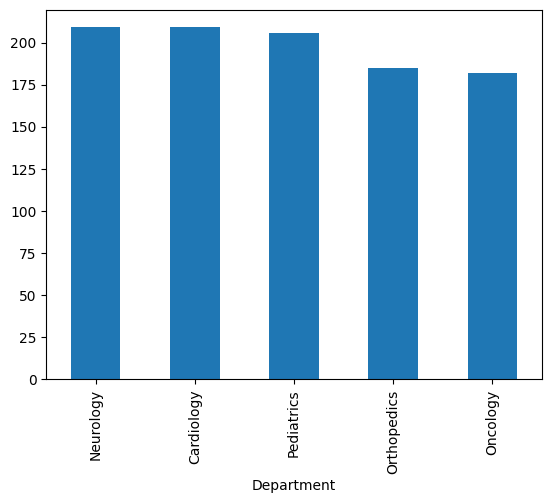

In [73]:
df["Department"].value_counts().plot(kind="bar")

In [74]:
df.describe()

,Age,Admission Date,Treatment Cost,Insurance Coverage %,Heart Rate,Temperature (C),Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year
count,991.000000,991,991.000000,991.000000,991.000000,991.000000,991,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,46.965691,2023-04-01 23:52:44.076690176,50408.708450,49.965429,109.458123,36.983653,2023-04-09 07:49:20.645812480,7.330979,15.216953,5.956609,2022.819374,16.013118,5.967709,2022.796165
min,1.000000,2022-01-01 00:00:00,13654.300000,0.000000,20.000000,33.000000,2022-01-02 00:00:00,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,2022.000000
25%,34.000000,2022-08-21 00:00:00,41490.560000,20.000000,71.000000,36.200000,2022-08-25 00:00:00,4.000000,7.000000,3.000000,2022.000000,8.000000,3.000000,2022.000000
50%,46.000000,2023-04-04 00:00:00,50408.708450,50.000000,108.000000,37.000000,2023-04-12 00:00:00,7.000000,15.000000,5.000000,2023.000000,16.000000,6.000000,2023.000000
75%,59.000000,2023-11-05 00:00:00,59297.965000,80.000000,147.000000,37.800000,2023-11-13 00:00:00,11.000000,23.000000,9.000000,2023.000000,24.000000,9.000000,2023.000000
max,97.000000,2024-06-17 00:00:00,88566.050000,100.000000,250.000000,40.800000,2024-06-26 00:00:00,14.000000,31.000000,12.000000,2024.000000,31.000000,12.000000,2024.000000
std,18.500200,NaN,13756.870591,31.194896,45.503624,1.191864,NaN,4.045629,8.890942,3.363370,0.734894,8.945900,3.405724,0.732248


In [75]:
df[(df["Heart Rate"]>220) | (df["Heart Rate"]<=30) ][["Heart Rate","Diagnosis"]]

,Heart Rate,Diagnosis
47,20,Hypertension
57,250,Fracture
129,20,Fracture
176,250,Cancer
233,20,Hypertension
242,250,Diabetes
281,250,COVID-19
287,250,Diabetes
305,250,Fracture
312,20,Cancer


In [76]:
heart_rate_mapping=df.groupby(["Diagnosis","Gender"])["Heart Rate"].mean().reset_index()

In [77]:
def heart_mapping(row):
  diagnosis=row["Diagnosis"]
  gender=row["Gender"]
  heart_rate=heart_rate_mapping[(heart_rate_mapping["Diagnosis"]==diagnosis) & (heart_rate_mapping["Gender"]==gender)]["Heart Rate"].reset_index(drop=True)[0]
  return heart_rate.astype(int)

In [78]:
heart_mapping(df.loc[1])

np.int64(102)

In [79]:
df.loc[(df["Heart Rate"] > 220) | (df["Heart Rate"] <= 30), "Heart Rate"] = df.loc[
    (df["Heart Rate"] > 220) | (df["Heart Rate"] <= 30)
].apply(heart_mapping, axis=1)

In [80]:
df[(df["Heart Rate"]>220) | (df["Heart Rate"]<=30) ]

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Temperature (C),Outcome,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  991 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Blood Pressure        991 non-null    object        
 12  Heart Rate            991 non-null    int64         
 13  Temperature (C)       991

In [82]:
df["Heart Rate"].isna().sum()

np.int64(0)

In [83]:
df["Temperature (C)"].describe()

,Temperature (C)
count,991.000000
mean,36.983653
std,1.191864
min,33.000000
25%,36.200000
50%,37.000000
75%,37.800000
max,40.800000


<Axes: ylabel='Temperature (C)'>

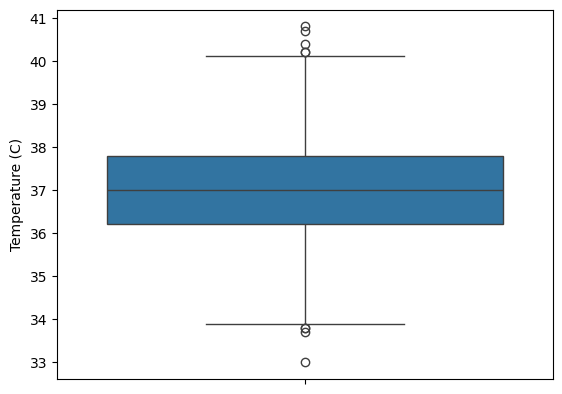

In [84]:
sns.boxplot(df["Temperature (C)"])

<Axes: ylabel='Heart Rate'>

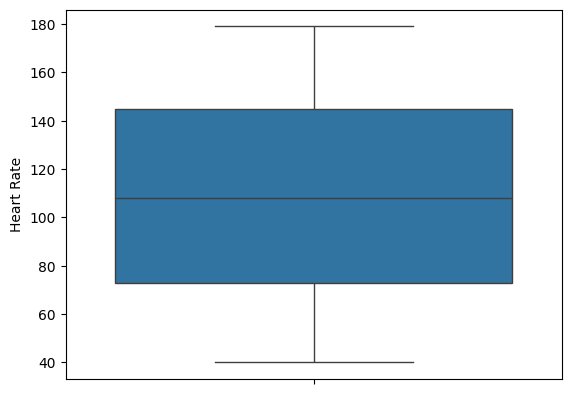

In [85]:
sns.boxplot(df["Heart Rate"])

In [86]:
Q1 = df["Temperature (C)"].quantile(0.25)
Q3 = df["Temperature (C)"].quantile(0.75)

# Step 2: Compute IQR
IQR = Q3 - Q1

In [87]:
IQR

np.float64(1.5999999999999943)

In [88]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [89]:
lower_bound, upper_bound

(np.float64(33.80000000000001), np.float64(40.19999999999999))

In [90]:
df[df["Temperature (C)"]>4]

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Temperature (C),Outcome,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95000,10.0,Semi-Private,...,39.1,Recovered,2022-12-27,5,27,12,2022,22,12,2022
2,PID1075,Daniel Allen,Female,33,2022-06-02,Neurology,Fracture,46347.34000,50.0,General,...,35.6,Recovered,2022-06-07,5,7,6,2022,2,6,2022
3,PID1924,Scott Walker,Male,53,2022-02-08,Neurology,COVID-19,66625.33000,90.0,Semi-Private,...,37.1,Recovered,2022-02-14,6,14,2,2022,8,2,2022
4,PID1026,Eric Sanchez,Male,49,2024-03-17,Orthopedics,Hypertension,44558.65000,0.0,Private,...,36.2,Recovered,2024-03-18,1,18,3,2024,17,3,2024
5,PID1735,Phyllis Duran,Female,42,2023-05-16,Neurology,Cancer,43142.60000,100.0,Private,...,36.9,Recovered,2023-05-18,2,18,5,2023,16,5,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PID1538,Justin Brown,Female,32,2023-04-16,Cardiology,Cancer,50408.70845,0.0,General,...,35.8,Recovered,2023-04-17,1,17,4,2023,16,4,2023
996,PID1273,Andrew Miranda,Other,50,2022-12-09,Cardiology,Hypertension,65282.18000,30.0,General,...,37.4,Recovered,2022-12-22,13,22,12,2022,9,12,2022
997,PID1535,Jerry Choi,Other,18,2022-09-17,Cardiology,Fracture,39582.76000,10.0,General,...,36.8,Under Treatment,2022-09-21,4,21,9,2022,17,9,2022
998,PID1815,Susan Shields,Female,24,2022-02-18,Orthopedics,Hypertension,30803.03000,40.0,General,...,38.8,Recovered,2022-02-21,3,21,2,2022,18,2,2022


In [91]:
df.columns

Index(['Patient ID', 'Name', 'Gender', 'Age', 'Admission Date', 'Department',
       'Diagnosis', 'Treatment Cost', 'Insurance Coverage %', 'Room Type',
       'Medication List', 'Blood Pressure', 'Heart Rate', 'Temperature (C)',
       'Outcome', 'Discharge Date', 'Stay', 'discharge_day', 'discharge_month',
       'discha_year', 'admission_day', 'admission_month', 'admission_year'],
      dtype='object')

In [92]:
#### Systolic BP and Diastolic BP

In [93]:
df["Systolic BP"]=df["Blood Pressure"].str.split("/").str[0]
df["Diastolic BP"]=df["Blood Pressure"].str.split("/").str[1]

In [94]:
df.drop("Blood Pressure",inplace=True,axis=1)

In [95]:
df.to_csv("datacln_hospital_patients.csv")

In [96]:
df

,Patient ID,Name,Gender,Age,Admission Date,Department,Diagnosis,Treatment Cost,Insurance Coverage %,Room Type,...,Discharge Date,Stay,discharge_day,discharge_month,discha_year,admission_day,admission_month,admission_year,Systolic BP,Diastolic BP
1,PID1669,Crystal Holden,Male,45,2022-12-22,Pediatrics,Diabetes,60868.95000,10.0,Semi-Private,...,2022-12-27,5,27,12,2022,22,12,2022,176,79
2,PID1075,Daniel Allen,Female,33,2022-06-02,Neurology,Fracture,46347.34000,50.0,General,...,2022-06-07,5,7,6,2022,2,6,2022,166,109
3,PID1924,Scott Walker,Male,53,2022-02-08,Neurology,COVID-19,66625.33000,90.0,Semi-Private,...,2022-02-14,6,14,2,2022,8,2,2022,114,72
4,PID1026,Eric Sanchez,Male,49,2024-03-17,Orthopedics,Hypertension,44558.65000,0.0,Private,...,2024-03-18,1,18,3,2024,17,3,2024,149,80
5,PID1735,Phyllis Duran,Female,42,2023-05-16,Neurology,Cancer,43142.60000,100.0,Private,...,2023-05-18,2,18,5,2023,16,5,2023,164,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PID1538,Justin Brown,Female,32,2023-04-16,Cardiology,Cancer,50408.70845,0.0,General,...,2023-04-17,1,17,4,2023,16,4,2023,95,87
996,PID1273,Andrew Miranda,Other,50,2022-12-09,Cardiology,Hypertension,65282.18000,30.0,General,...,2022-12-22,13,22,12,2022,9,12,2022,169,76
997,PID1535,Jerry Choi,Other,18,2022-09-17,Cardiology,Fracture,39582.76000,10.0,General,...,2022-09-21,4,21,9,2022,17,9,2022,92,76
998,PID1815,Susan Shields,Female,24,2022-02-18,Orthopedics,Hypertension,30803.03000,40.0,General,...,2022-02-21,3,21,2,2022,18,2,2022,111,67


In [97]:
### EDA

In [98]:
df["insurance_paid"]=df["Treatment Cost"]*df["Insurance Coverage %"]/100

In [99]:
df["Systolic BP"]=df["Systolic BP"].astype(int)
df["Diastolic BP"]=df["Diastolic BP"].astype(int)

In [100]:
##Temperature > 39, or Heart Rate > 130, or Systolic BP > 150, or Diastolic BP > 90

df["high_risk"]= np.where((df["Temperature (C)"]>39) | (df["Heart Rate"]>130) | (df["Systolic BP"]>150) | (df["Diastolic BP"]>90),1,0)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient ID            991 non-null    object        
 1   Name                  991 non-null    object        
 2   Gender                991 non-null    object        
 3   Age                   991 non-null    int64         
 4   Admission Date        991 non-null    datetime64[ns]
 5   Department            991 non-null    object        
 6   Diagnosis             991 non-null    object        
 7   Treatment Cost        991 non-null    float64       
 8   Insurance Coverage %  991 non-null    float64       
 9   Room Type             991 non-null    object        
 10  Medication List       991 non-null    object        
 11  Heart Rate            991 non-null    int64         
 12  Temperature (C)       991 non-null    float64       
 13  Outcome               991

In [102]:
df["Medication List"]

,Medication List
1,"Paracetamol, Vitamin D, Insulin"
2,Vitamin D
3,"Insulin, Aspirin, Antibiotic"
4,"Vitamin D, Insulin, Aspirin"
5,Paracetamol
...,...
995,"Aspirin, Paracetamol"
996,Aspirin
997,"Vitamin D, Paracetamol"
998,Vitamin D


In [103]:
df["Medication List"].str.split(",")

,Medication List
1,"[Paracetamol, Vitamin D, Insulin]"
2,[Vitamin D]
3,"[Insulin, Aspirin, Antibiotic]"
4,"[Vitamin D, Insulin, Aspirin]"
5,[Paracetamol]
...,...
995,"[Aspirin, Paracetamol]"
996,[Aspirin]
997,"[Vitamin D, Paracetamol]"
998,[Vitamin D]


In [104]:
df["Medication List"].isna().sum()

np.int64(0)

In [105]:
all_medicines=set()
for meds in df["Medication List"]:
  all_medicines.update([med.strip() for med in meds.split(",")])



In [106]:
all_medicines

{'Antibiotic', 'Aspirin', 'Insulin', 'Paracetamol', 'Vitamin D'}

In [107]:
from collections import Counter
all_medicine_list = []

for meds in df["Medication List"].dropna():
    all_medicine_list.extend([med.strip() for med in meds.split(",")])


medicine_counts = Counter(all_medicine_list)


In [108]:
medicine_counts

Counter({'Paracetamol': 401,
         'Vitamin D': 389,
         'Insulin': 395,
         'Aspirin': 397,
         'Antibiotic': 392})

In [109]:
df.groupby("Diagnosis")["Patient ID"].count()

,Patient ID
Diagnosis,
COVID-19,211
Cancer,191
Diabetes,176
Fracture,215
Hypertension,198


In [110]:
df.groupby("Gender")["Heart Rate"].mean()

,Heart Rate
Gender,
Female,111.134434
Male,106.369072
Other,114.902439


In [111]:
df.Outcome

,Outcome
1,Recovered
2,Recovered
3,Recovered
4,Recovered
5,Recovered
...,...
995,Recovered
996,Recovered
997,Under Treatment
998,Recovered


In [112]:


df.groupby(["Department","Outcome"])["Treatment Cost"].mean()

Department   Outcome        
Cardiology   Deceased           52026.173333
             Recovered          51265.767535
             Under Treatment    53441.073876
Neurology    Deceased           50172.371690
             Recovered          51298.246814
             Under Treatment    51518.897129
Oncology     Deceased           52958.581818
             Recovered          51205.611269
             Under Treatment    50451.099020
Orthopedics  Deceased           52100.480563
             Recovered          46956.096023
             Under Treatment    50204.394903
Pediatrics   Deceased           52691.724496
             Recovered          49915.564703
             Under Treatment    49773.190939
Name: Treatment Cost, dtype: float64

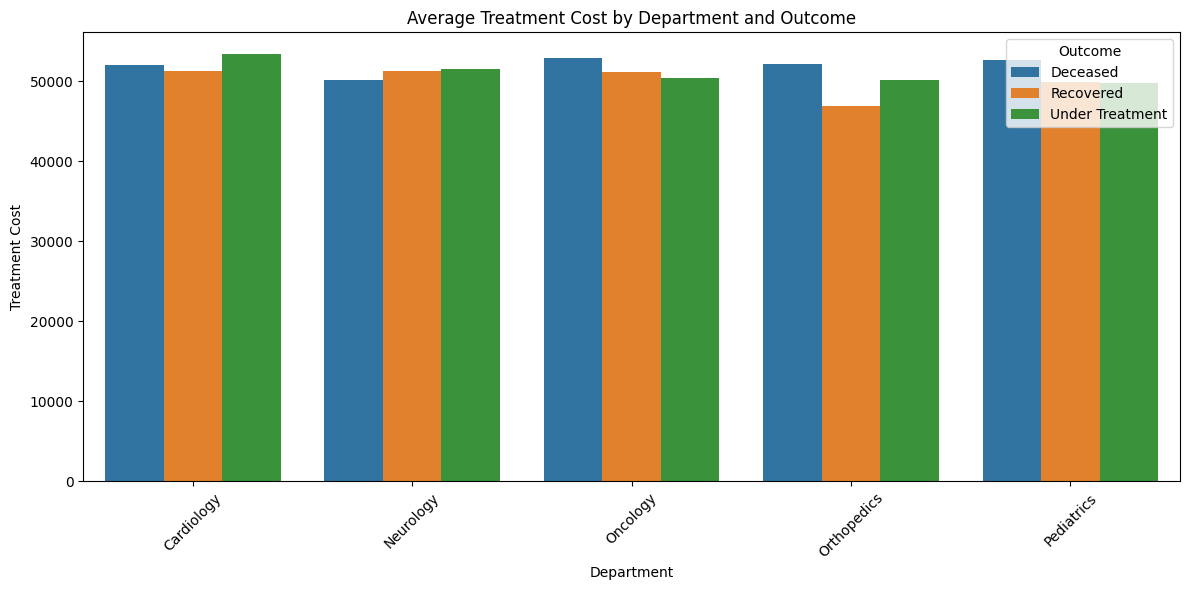

In [113]:
grouped_cost = df.groupby(["Department", "Outcome"])["Treatment Cost"].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_cost, x="Department", y="Treatment Cost", hue="Outcome")

plt.title("Average Treatment Cost by Department and Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [117]:
df.groupby(["Diagnosis"])["Outcome"].value_counts()

Diagnosis     Outcome        
COVID-19      Recovered          177
              Under Treatment     20
              Deceased            14
Cancer        Recovered          167
              Under Treatment     18
              Deceased             6
Diabetes      Recovered          148
              Under Treatment     18
              Deceased            10
Fracture      Recovered          171
              Under Treatment     29
              Deceased            15
Hypertension  Recovered          174
              Under Treatment     13
              Deceased            11
Name: count, dtype: int64

In [124]:
df.groupby(["Department"])["Patient ID"].count()

,Patient ID
Department,
Cardiology,209
Neurology,209
Oncology,182
Orthopedics,185
Pediatrics,206


In [119]:
df.columns

Index(['Patient ID', 'Name', 'Gender', 'Age', 'Admission Date', 'Department',
       'Diagnosis', 'Treatment Cost', 'Insurance Coverage %', 'Room Type',
       'Medication List', 'Heart Rate', 'Temperature (C)', 'Outcome',
       'Discharge Date', 'Stay', 'discharge_day', 'discharge_month',
       'discha_year', 'admission_day', 'admission_month', 'admission_year',
       'Systolic BP', 'Diastolic BP', 'insurance_paid', 'high_risk'],
      dtype='object')

In [129]:
df.groupby(["Diagnosis", "Department"])["high_risk"].mean().reset_index()

,Diagnosis,Department,high_risk
0,COVID-19,Cardiology,0.695652
1,COVID-19,Neurology,0.800000
2,COVID-19,Oncology,0.769231
3,COVID-19,Orthopedics,0.847826
4,COVID-19,Pediatrics,0.750000
5,Cancer,Cardiology,0.638298
6,Cancer,Neurology,0.702703
7,Cancer,Oncology,0.666667
8,Cancer,Orthopedics,0.783784
9,Cancer,Pediatrics,0.764706


In [137]:
df.groupby(["Department"])["Diagnosis"].value_counts()

Department   Diagnosis   
Cardiology   Cancer          47
             COVID-19        46
             Fracture        45
             Hypertension    43
             Diabetes        28
Neurology    Fracture        55
             Hypertension    41
             COVID-19        40
             Cancer          37
             Diabetes        36
Oncology     COVID-19        39
             Hypertension    38
             Cancer          36
             Diabetes        36
             Fracture        33
Orthopedics  COVID-19        46
             Hypertension    39
             Cancer          37
             Fracture        33
             Diabetes        30
Pediatrics   Fracture        49
             Diabetes        46
             COVID-19        40
             Hypertension    37
             Cancer          34
Name: count, dtype: int64

In [138]:
# Step 1: Count diagnoses per department
diagnosis_counts = df.groupby(["Department", "Diagnosis"]).size().reset_index(name="count")

# Step 2: Get the most common diagnosis per department
most_common = diagnosis_counts.sort_values("count", ascending=False).groupby("Department").first().reset_index()

# Display the result
print(most_common)


    Department Diagnosis  count
0   Cardiology    Cancer     47
1    Neurology  Fracture     55
2     Oncology  COVID-19     39
3  Orthopedics  COVID-19     46
4   Pediatrics  Fracture     49


In [139]:
df.columns

Index(['Patient ID', 'Name', 'Gender', 'Age', 'Admission Date', 'Department',
       'Diagnosis', 'Treatment Cost', 'Insurance Coverage %', 'Room Type',
       'Medication List', 'Heart Rate', 'Temperature (C)', 'Outcome',
       'Discharge Date', 'Stay', 'discharge_day', 'discharge_month',
       'discha_year', 'admission_day', 'admission_month', 'admission_year',
       'Systolic BP', 'Diastolic BP', 'insurance_paid', 'high_risk'],
      dtype='object')

In [140]:
df.groupby(["Room Type"])["Insurance Coverage %"].mean()

,Insurance Coverage %
Room Type,
General,51.033844
Private,48.663933
Semi-Private,49.897157


<Axes: xlabel='Department,Outcome'>

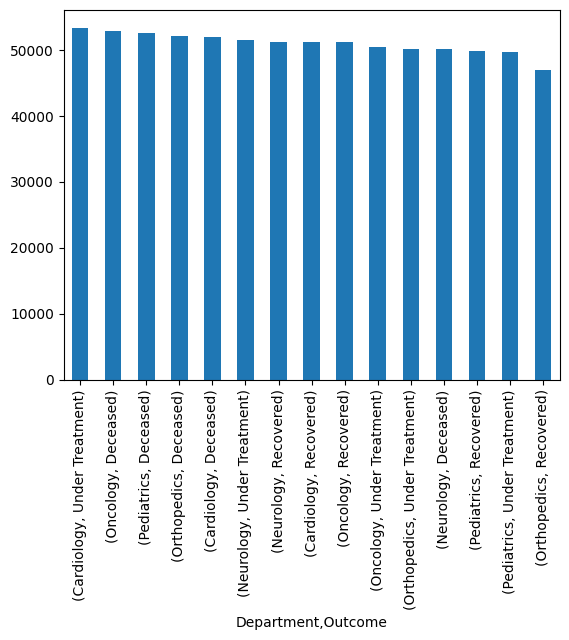

In [143]:
df.groupby(["Department","Outcome"])["Treatment Cost"].mean().sort_values(ascending=False).plot(kind="bar")